In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from paths import RAW_DIR, STAGE_DIR
from display import cdisplay
from functions import get_populations, cost_analysis, risk_analysis
from plots import plot_risk_cost_reduction

In [3]:
data = pd.read_parquet(STAGE_DIR / 'process' / 'predictions.parquet')
data_univariate = pd.read_parquet(STAGE_DIR / 'process' / 'predictions_univariate.parquet')
data_multivariate = pd.read_parquet(STAGE_DIR / 'process' / 'predictions_multivariate.parquet')

In [4]:
TARGET = 'HeartDiseaseorAttack'
POST_TREATMENT_COST = 50000
PLAN_COST = 1000
REDUCTION_GOAL_PERCENTAGE = 0.8
ACCEPTANCE_PERCENTAGE = 0.85
RISK_REDUCTION_PERCENTAGE = 0.75

# Basic cost analysis

The basic cost analysis strategy aims to know the plan's adherance percentage needed to achieve the 20% cost's reduction. The model output is used to select the most vulnerable population to be offer the plan and reducing also the heart attack risk in the population.

$$
R = A * 1000 + (N - A) * 50000 \\
R = A * 1000 - A * 50000 + N * 50000 \\
R = -49000 * A + N * 50000 \\
A = \frac{N * 50000 - R}{49000}
$$

[a, c, d, wef, wf, w, qe]

[0.1, 0.2, 0.3, 0.4, 0.5, ...]

=> t_1 = 0.5  => N = |P_{p>= 0.5}| => offer

=> t_2 = 0.3  => N = |P_{p>= 0.3}| => offer

=> t_3 = 0.2  => N = |P_{p>= 0.2}| => offer

threholds = [...]

costs = [cost_analysis(...) for t in thresholds]

sns.lineplot(x=thresholds, y=costs)

In [5]:
adherance_percentage, reduced_cost = cost_analysis(
    df=data,
    prob_column='proba',
    target_column=TARGET,
    reduction_goal=REDUCTION_GOAL_PERCENTAGE,
    acceptance_percentage=ACCEPTANCE_PERCENTAGE,
    pre_cost=PLAN_COST,
    post_cost=POST_TREATMENT_COST
)

population_amount=23893
baseline_cost=1194650000
reduced_cost=955720000.0
adherence_amount=4876.122448979592
adherence_percentage=0.24009603841536617


In [8]:
offer_df, _, adherance_df = get_populations(
    df=data,
    prob_column='proba',
    target_column=TARGET,
    acceptance_percentage=ACCEPTANCE_PERCENTAGE,
    adherence_percentage=adherance_percentage
)

In [9]:
risk_analysis(offer_df, adherance_df, 'proba', RISK_REDUCTION_PERCENTAGE)

mean_baseline_risk=0.5202128641045853
mean_reduced_risk=0.49365321764298015


0.49365321764298015

adherence_percentages=array([0.24009604, 0.34009604, 0.44009604, 0.54009604, 0.64009604,
       0.74009604, 0.84009604, 0.94009604])
mean_risk_reductions=[0.48901720664582254, 0.47608628869898334, 0.4630604613924595, 0.4500096852913816, 0.4367909580285769, 0.4238178685641861, 0.411194195768218, 0.39825255802755793]
cost_reductions=[913555882.3529412, 796480182.3529412, 679404482.3529413, 562328782.352941, 445253082.35294104, 328177382.35294104, 211101682.35294104, 94025982.35294104]


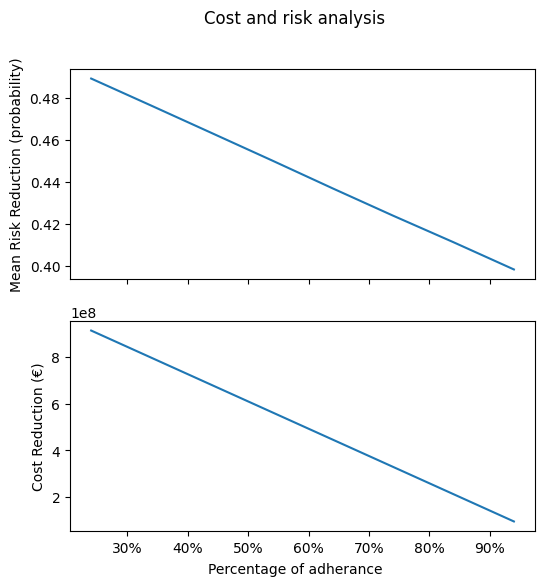

In [12]:
plot_risk_cost_reduction(
    df=offer_df,
    prob_column='proba',
    risk_reduction=RISK_REDUCTION_PERCENTAGE,
    base_adherance_percentage=adherance_percentage,
    post_cost=POST_TREATMENT_COST,
    pre_cost=PLAN_COST
)

# Complex cost analysis

With the basic aproach, we are leaving outside the fact that if a person doesn't adhere to the plan, then they are still prone to have a heart attack or disease, reporting a cost of €51 000 (€1000 for the plan and €50 000 for the treatment after they have the heart disease). Also, we are not taking into account that the risk reduction is only of 75% if they adhere to the plan. So, if they are above a threshold, then, they can still have a heart attack and cost also €51 000.